/Users/tgulur/Documents/EE555/Project


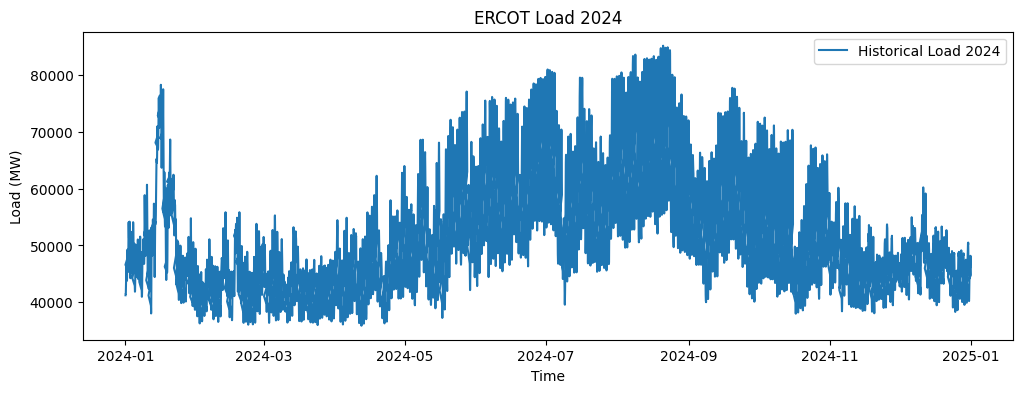

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import os

# Get current working directory
path = os.getcwd()
# Load the dataset
df = pd.read_excel(path + "/Native_Load_2024.xlsx")

df['Hour Ending'] = df['Hour Ending'].str.replace(' 24:00', ' 00:00')
df['Hour Ending'] = df['Hour Ending'].str.replace(' DST', '')
df['Hour Ending'] = pd.to_datetime(df['Hour Ending'], format='%m/%d/%Y %H:%M')
df.set_index('Hour Ending', inplace=True)

load_series = df['ERCOT']

plt.figure(figsize=(12,4))
plt.plot(load_series, label='Historical Load 2024')
plt.title("ERCOT Load 2024")
plt.xlabel("Time")
plt.ylabel("Load (MW)")
plt.legend()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/dh/j5bmpt9d6clgh4sxgj75h9zh0000gn/T/ipykernel_12295/3087110683.py:21: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_index = pd.date_range(start=load_series.index[-1] + pd.Timedelta(hours=1),


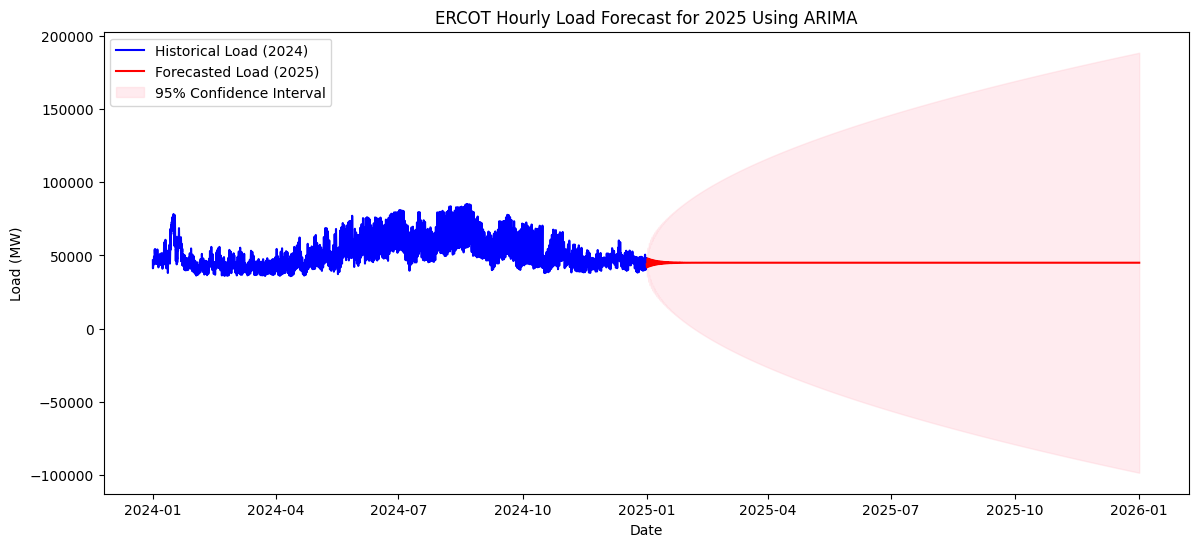

In [30]:
# Define the forecast horizon (1 year ahead)
forecast_horizon = 24 * 365

# Remove duplicate labels in the index
load_series = load_series[~load_series.index.duplicated(keep='first')]

load_series.index = pd.to_datetime(load_series.index)
load_series = load_series.asfreq('h')
load_series.sort_index()

# Fit the ARIMA model
model = ARIMA(load_series, order=(2,1,2))
model_fit = model.fit()

# Generate the forecast
forecast_obj = model_fit.get_forecast(steps=forecast_horizon)
forecast_mean = forecast_obj.predicted_mean
forecast_ci = forecast_obj.conf_int()

# Create the forecast index
forecast_index = pd.date_range(start=load_series.index[-1] + pd.Timedelta(hours=1),
                               periods=forecast_horizon, freq='H')
forecast_series = pd.Series(forecast_mean, index=forecast_index)

# Plot the historical load and forecasted load with confidence intervals
plt.figure(figsize=(14,6))
plt.plot(load_series, label='Historical Load (2024)', color='blue')
plt.plot(forecast_series, label='Forecasted Load (2025)', color='red')
plt.fill_between(forecast_index, 
                 forecast_ci.iloc[:, 0], 
                 forecast_ci.iloc[:, 1], color='pink', alpha=0.3, label='95% Confidence Interval')
plt.title("ERCOT Hourly Load Forecast for 2025 Using ARIMA")
plt.xlabel("Date")
plt.ylabel("Load (MW)")
plt.legend()
plt.show()

In [27]:
# df.index = pd.DatetimeIndex(df.index).to_period('H')
model = ARIMA(load_series, order=(2,1,2))
model_fit = model.fit()
print(model_fit.summary())

# forecast_horizon = 24 * 365
# forecast_obj = model_fit.get_forecast(steps=forecast_horizon)
# forecast_mean = forecast_obj.predicted_mean
# forecast_ci =  forecast_obj.conf_int()
# forecast_index = pd.date_range(start=load_series.index[-1] + pd.Timedelta(hours=1),
#                                periods=forecast_horizon, freq='h')
# forecast_series = pd.Series(forecast_mean, index=forecast_index)



# model = ARIMA(load_series, order=(2,1,2))
# model_fit = model.fit()
# print(model_fit.summary())


# forecast_horizon = 24 * 365
# forecast_obj = model_fit.get_forecast(steps=forecast_horizon)
# forecast_mean = forecast_obj.predicted_mean
# forecast_ci =  forecast_obj.conf_int()

# forecast_index = pd.date_range(start=load_series.index[-1] + pd.Timedelta(hours=1),
#                                periods=forecast_horizon, freq='H')
# forecast_series = pd.Series(forecast_mean, index=forecast_index)

# plt.figure(figsize=(14,6))
# plt.plot(load_series, label='Historical Load (2024)', color='blue')
# plt.plot(forecast_series, label='Forecasted Load (2025)', color='red')
# plt.fill_between(forecast_index, 
#                  forecast_ci.iloc[:, 0], 
#                  forecast_ci.iloc[:, 1], color='pink', alpha=0.3, label='95% Confidence Interval')
# plt.title("ERCOT Hourly Load Forecast for 2025 Using ARIMA")
# plt.xlabel("Date")
# plt.ylabel("Load (MW)")
# plt.legend()
# plt.show()




/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has bee

                               SARIMAX Results                                
Dep. Variable:                  ERCOT   No. Observations:                 8784
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -69492.819
Date:                Wed, 05 Feb 2025   AIC                         138995.639
Time:                        14:24:01   BIC                         139031.042
Sample:                             0   HQIC                        139007.700
                               - 8784                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8073      0.002   1166.852      0.000       1.804       1.810
ar.L2         -0.8783      0.002   -492.250      0.000      -0.882      -0.875
ma.L1         -0.6698      0.007   -100.569      0.0

16:25:12 - cmdstanpy - INFO - Chain [1] start processing
16:25:15 - cmdstanpy - INFO - Chain [1] done processing


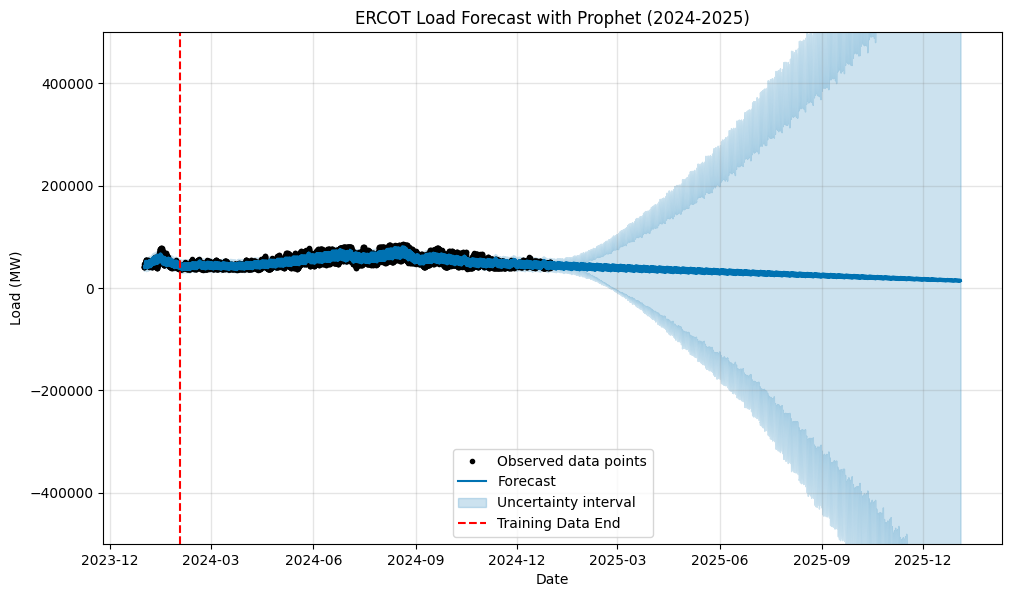

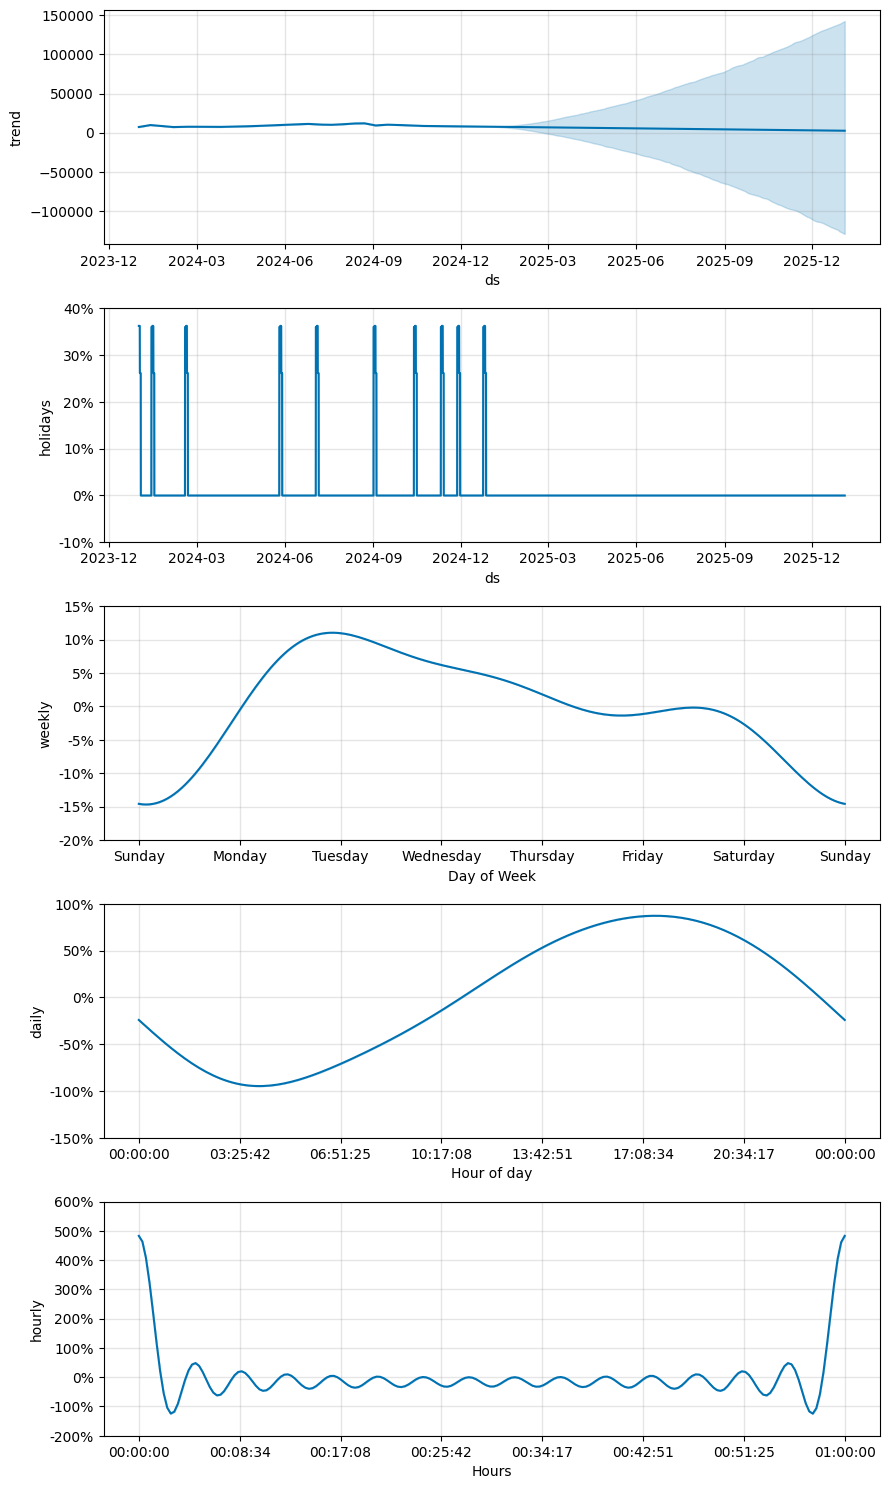

Mean Squared Error: 21369112.104174748
Mean Absolute Error: 3507.123211006066
                       ds          yhat     yhat_lower     yhat_upper
17611 2026-01-03 19:00:00  15953.063609 -835213.736021  928280.266805
17612 2026-01-03 20:00:00  15667.212969 -823774.556016  909789.607775
17613 2026-01-03 21:00:00  15239.113811 -800622.005237  886909.736744
17614 2026-01-03 22:00:00  14682.085867 -772067.983791  856382.189566
17615 2026-01-03 23:00:00  14025.255049 -737000.900421  822569.220307


In [13]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import os


path = os.getcwd()
# Load and preprocess data
df = pd.read_excel(path + "/Native_Load_2024.xlsx")

# Clean datetime format and handle 24:00 values
df['Hour Ending'] = (df['Hour Ending']
                     .str.replace(' 24:00', ' 00:00')
                     .str.replace(' DST', ''))
df['ds'] = pd.to_datetime(df['Hour Ending'], format='%m/%d/%Y %H:%M')
df = df.rename(columns={'ERCOT': 'y'})

# Filter relevant columns
prophet_df = df[['ds', 'y']].sort_values('ds').reset_index(drop=True)

# Handle duplicate/missing timestamps
prophet_df = prophet_df[~prophet_df['ds'].duplicated(keep='first')]
prophet_df = prophet_df.set_index('ds').asfreq('h').ffill().reset_index()

# Initialize and fit Prophet model
model = Prophet(
    yearly_seasonality=False,  # Disabled due to short training history
    weekly_seasonality=True,
    daily_seasonality=True,
    seasonality_mode='multiplicative',
    holidays=pd.DataFrame({
        'holiday': 'US_holiday',
        'ds': pd.to_datetime([
            '2024-01-01', '2024-01-15', '2024-02-19', '2024-05-27', 
            '2024-07-04', '2024-09-02', '2024-10-14', '2024-11-11', 
            '2024-11-28', '2024-12-25'
        ]),
        'lower_window': -1,
        'upper_window': 1
    })
)

model.add_seasonality(
    name='hourly',
    period=1/24,
    fourier_order=15,
    prior_scale=0.1
)

model.fit(prophet_df)

# Create future dataframe (until Feb 5, 2025)
future = model.make_future_dataframe(
    periods=24*365 + 24*3,  # Full year + 3 days buffer
    freq='h',
    include_history=True
)

# Generate forecast
forecast = model.predict(future)

# Plot results
fig = model.plot(forecast)
plt.title('ERCOT Load Forecast with Prophet (2024-2025)')
plt.xlabel('Date')
plt.ylabel('Load (MW)')
plt.axvline(x=pd.to_datetime('2024-02-02'), color='r', linestyle='--', 
           label='Training Data End')
plt.ylim(-500000, 500000)
plt.legend()
plt.show()

# Show components
fig2 = model.plot_components(forecast)
plt.show()

# Print summary statistics of the forecast including the MSE and MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_true = prophet_df['y']
y_pred = forecast['yhat'][:len(y_true)]
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


215/215 ━━━━━━━━━━━━━━━━━━━━ 26s 116ms/step - loss: 0.0391 - val_loss: 0.0042
Epoch 2/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 25s 116ms/step - loss: 0.0060 - val_loss: 0.0033
Epoch 3/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 25s 118ms/step - loss: 0.0056 - val_loss: 0.0033
Epoch 4/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 26s 122ms/step - loss: 0.0055 - val_loss: 0.0033
Epoch 5/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 25s 117ms/step - loss: 0.0052 - val_loss: 0.0035
Epoch 6/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 26s 119ms/step - loss: 0.0049 - val_loss: 0.0031
Epoch 7/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 26s 119ms/step - loss: 0.0048 - val_loss: 0.0031
Epoch 8/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 26s 119ms/step - loss: 0.0052 - val_loss: 0.0035
Epoch 9/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 26s 120ms/step - loss: 0.0049 - val_loss: 0.0031
Epoch 10/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 26s 122ms/step - loss: 0.0047 - val_loss: 0.0030
Epoch 11/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 26s 121ms/step - loss: 0.0045 - val_loss: 0.0034
Epoch 12/50
215/215 ━━━━━━━━━━

/var/folders/dh/j5bmpt9d6clgh4sxgj75h9zh0000gn/T/ipykernel_12295/804756321.py:94: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(hours=1),


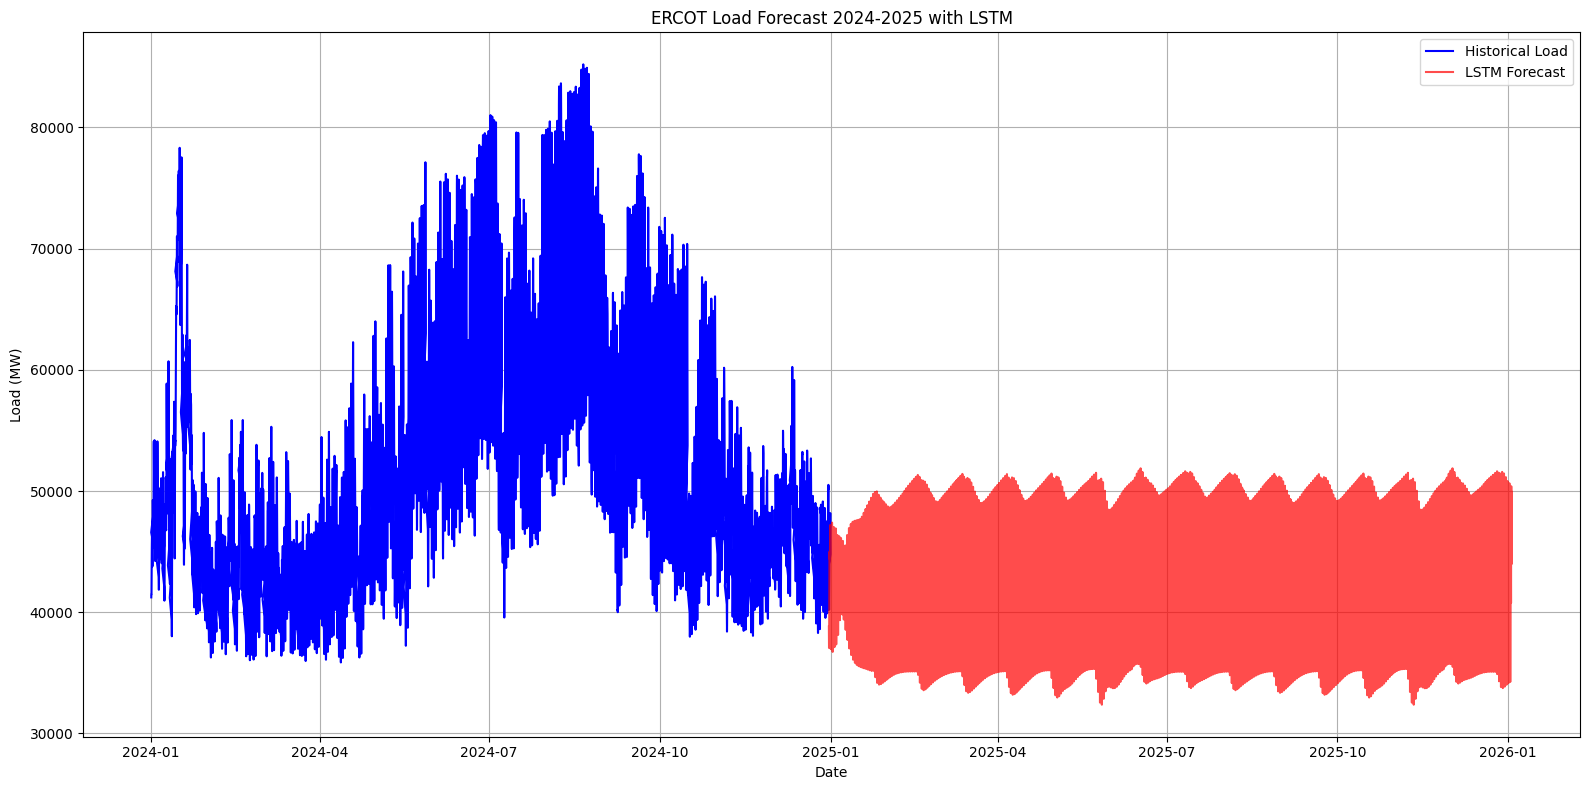

In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import os


path = os.getcwd()
# Load and preprocess data
df = pd.read_excel(path + "/Native_Load_2024.xlsx")

# Clean and convert datetime
df['Hour Ending'] = (df['Hour Ending']
                    .str.replace(' 24:00', ' 00:00')
                    .str.replace(' DST', ''))
df['Hour Ending'] = pd.to_datetime(df['Hour Ending'], format='%m/%d/%Y %H:%M')
df.set_index('Hour Ending', inplace=True)
load_series = df['ERCOT'].astype(float)

# Feature engineering
df['hour'] = df.index.hour
df['dayofweek'] = df.index.dayofweek
df['dayofyear'] = df.index.dayofyear

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['ERCOT', 'hour', 'dayofweek']])

# Create sequences with 168-hour (7-day) lookback and 24-hour forecast
def create_sequences(data, lookback, forecast_horizon):
    X, y = [], []
    for i in range(len(data)-lookback-forecast_horizon):
        X.append(data[i:(i+lookback)])
        y.append(data[(i+lookback):(i+lookback+forecast_horizon), 0])
    return np.array(X), np.array(y)

LOOKBACK = 168  # 7 days of hourly data
FORECAST = 24   # Predict next 24 hours
X, y = create_sequences(scaled_data, LOOKBACK, FORECAST)

# Split dataset
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(LOOKBACK, X.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dense(FORECAST))

model.compile(optimizer='adam', loss='mse')

# Train model
history = model.fit(X_train, y_train, 
                   epochs=50, 
                   batch_size=32,
                   validation_data=(X_test, y_test),
                   verbose=1)

# Recursive multi-step forecasting
def forecast_future(model, last_sequence, future_steps):
    forecasts = []
    current_sequence = last_sequence.copy()
    
    for _ in range(future_steps // FORECAST + 1):
        # Predict next FORECAST hours
        pred = model.predict(current_sequence.reshape(1, LOOKBACK, -1))[0]
        forecasts.extend(pred)
        
        # Update sequence with prediction
        new_entry = np.zeros((1, X.shape[2]))
        new_entry[0,0] = pred[0]  # Only update ERCOT value
        new_entry[0,1] = (current_sequence[-1,1] + 1) % 24  # Update hour
        new_entry[0,2] = (current_sequence[-1,2] + (1/24)) % 7  # Update dayofweek
        
        current_sequence = np.vstack([current_sequence[1:], new_entry])
    
    return forecasts[:future_steps]

# Generate forecast through Feb 5, 2025
last_known = scaled_data[-LOOKBACK:]
forecast_steps = 24 * 365 + 24 * 3  # Full year + buffer
forecast = forecast_future(model, last_known, forecast_steps)

# Inverse transform predictions
forecast_array = np.zeros((len(forecast), scaled_data.shape[1]))
forecast_array[:,0] = forecast
forecast_ercot = scaler.inverse_transform(forecast_array)[:,0]

# Create date range for forecast
forecast_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(hours=1),
                              periods=len(forecast_ercot),
                              freq='H')

# Plot results
plt.figure(figsize=(16,8))
plt.plot(df.index, df['ERCOT'], label='Historical Load', color='blue')
plt.plot(forecast_dates, forecast_ercot, label='LSTM Forecast', color='red', alpha=0.7)
plt.title('ERCOT Load Forecast 2024-2025 with LSTM')
plt.xlabel('Date')
plt.ylabel('Load (MW)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from pmdarima import auto_arima

path = os.getcwd()
# Load and preprocess data
df = pd.read_excel(path + "/Native_Load_2024.xlsx")

# Convert 'Hour Ending' to datetime and set as index
df['Hour Ending'] = pd.to_datetime(df['Hour Ending'].str.replace(' 24:00', ' 00:00').str.replace(' DST', ''))
df = df.set_index('Hour Ending')

# Use the 'ERCOT' column for our analysis
load_series = df['ERCOT'].astype(float)

# Determine optimal SARIMA parameters using auto_arima
auto_model = auto_arima(load_series, seasonal=True, m=24, 
                        start_p=0, start_q=0, max_p=3, max_q=3, 
                        start_P=0, start_Q=0, max_P=2, max_Q=2,
                        d=1, D=1, trace=True, error_action='ignore', 
                        suppress_warnings=True, stepwise=True)

print(f"Best SARIMA model: {auto_model.order}x{auto_model.seasonal_order}")

# Fit the SARIMA model with the best parameters
model = SARIMAX(load_series, order=auto_model.order, 
                seasonal_order=auto_model.seasonal_order)
results = model.fit()

# Print model summary
print(results.summary())

# Forecast for the next year (8760 hours)
forecast = results.get_forecast(steps=8760)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Create a date range for the forecast period
last_date = load_series.index[-1]
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(hours=1), periods=8760, freq='H')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(load_series.index, load_series, label='Historical Data')
plt.plot(forecast_dates, forecast_mean, color='red', label='Forecast')
plt.fill_between(forecast_dates, 
                 forecast_ci.iloc[:, 0], 
                 forecast_ci.iloc[:, 1], 
                 color='pink', alpha=0.3)
plt.title('ERCOT Load Forecast using SARIMA')
plt.xlabel('Date')
plt.ylabel('Load (MW)')
plt.legend()
plt.tight_layout()
plt.show()

# Print forecast for February 5, 2025 at 4 PM PST (6 PM CST)
target_date = pd.Timestamp('2025-02-05 18:00:00')
target_forecast = forecast_mean.loc[target_date]
print(f"Forecasted load for {target_date}: {target_forecast:.2f} MW")


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[24]             : AIC=138986.137, Time=0.27 sec


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,1,0)[24]             : AIC=132180.040, Time=6.27 sec


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,1)[24]             : AIC=132283.984, Time=12.96 sec


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,1,0)[24]             : AIC=132842.733, Time=1.34 sec


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,0)[24]             : AIC=131780.807, Time=15.62 sec


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,1)[24]             : AIC=inf, Time=32.60 sec


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,1,1)[24]             : AIC=inf, Time=13.22 sec


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,1,0)[24]             : AIC=138166.258, Time=7.63 sec


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,1,0)[24]             : AIC=131004.666, Time=20.36 sec


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(1,1,0)[24]             : AIC=131431.715, Time=8.86 sec


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,1,1)[24]             : AIC=inf, Time=41.94 sec


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(1,1,1)[24]             : AIC=inf, Time=19.67 sec


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(2,1,0)[24]             : AIC=131006.592, Time=17.10 sec


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(2,1,0)[24]             : AIC=131006.492, Time=25.76 sec


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


: 